In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
with open("experiments_no_time_arrival_20.json", 'r') as f:
    a = json.load(f)

In [3]:
with open("experiments_time_arrival_20.json", 'r') as f:
    b = json.load(f)

In [10]:
with open("experiments_4_time_windows_arrival_20.json", 'r') as f:
    c = json.load(f)

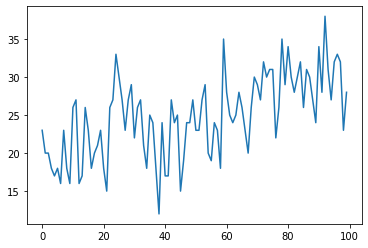

In [4]:
s = []
for i,day in enumerate(a):
    s.append(-sum(day[f'day{i}_0']['futile_deliveries']) + day[f'day{i}_0']['number_of_packages'])
s
plt.plot(s)

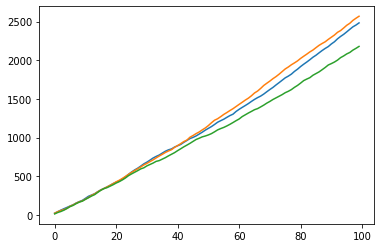

In [12]:
t = []
for i,day in enumerate(b):
    t.append(-sum(day[f'day{i}_0']['futile_deliveries']) + day[f'day{i}_0']['number_of_packages'])
q = []
for i,day in enumerate(c):
    q.append(-sum(day[f'day{i}_0']['futile_deliveries']) + day[f'day{i}_0']['number_of_packages'])
plt.plot(np.cumsum(s))
plt.plot(np.cumsum(t))
plt.plot(np.cumsum(q))

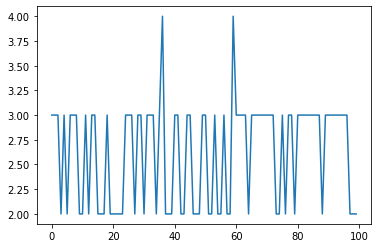

In [20]:
packages = []
for i,day in enumerate(a):
    packages.append(sum(np.array(day[f'day{i}_0']['deliveries_attempted']) > 0))
plt.plot(packages)

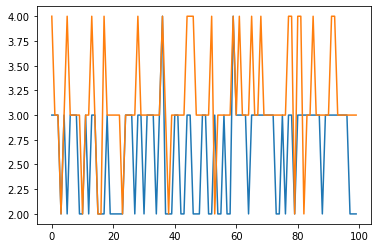

In [21]:
packages2 = []
for i,day in enumerate(b):
    packages2.append(sum(np.array(day[f'day{i}_0']['deliveries_attempted']) > 0))
plt.plot(packages)
plt.plot(packages2)

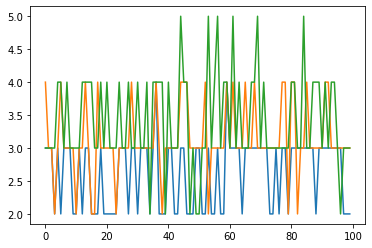

In [22]:
packages3 = []
for i,day in enumerate(c):
    packages3.append(sum(np.array(day[f'day{i}_0']['deliveries_attempted']) > 0))
plt.plot(packages)
plt.plot(packages2)
plt.plot(packages3)

Ok, so this is the first result that is obviously meaningful. Other metrics seem somewhat inconclusive, in particular there is no apparent difference in the backlog observed. The above graph shows that the blue line has a maximum of 3, the orange a maximum of 4, and the green a maximum of 5. This is the count of vehicles used on a day, which is capped at 5 in all experiments. This difference is caused by the inclusion of time windows.

So in short, having narrower time windows without changing the underlying simulation behaviour has little effect on number of packages delivered, but does require more vehicles to achieve this.